# Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

___

# Functions

In [2]:
# A Function to create bar plots
def bar_plot(column, title):
    students.loc[:, column].value_counts().plot(kind='bar',
                                                grid=True,
                                                colormap='coolwarm',
                                                title=title)
    print('Numbers for {} column'.format(column))
    display(students.loc[:, column].describe())
    display(students.loc[:, column].value_counts())
    plt.show()

# --------------------------------------------------------

# A Function to create boxplot graphs comparing to Score, taken from the example


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# --------------------------------------------------------

# A function that calculates IQR and defines outlier borders,
# and showing how many values were outside the set outlier border range


def IQRfunkc(column):
    quantmin = 0
    quantmax = 0
    col = students.loc[:, column]
    IQR = col.quantile(0.75) - col.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    lowbord = perc25 - 1.5*IQR
    highbord = perc75 + 1.5*IQR
    for i in col:
        if i < lowbord:
            quantmin += 1
    for j in col:
        if j > highbord:
            quantmax += 1
    # showing only columns that have outliers on either side
    if quantmin > 0 or quantmax > 0:
        print('\nThis data is for column {} \n Q1: {} \n Q3: {} \n Bottom border:{} ; Top border:{}\n'.format(
            column, perc25, perc75, lowbord, highbord))
        print('Number of rows that are lower than bottom outlier border', quantmin)
        print('Number of rows that are higher than top outlier border', quantmax)

# --------------------------------------------------------

# A function that calculates statistical diffrences, taken from the example


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# --------------------------------------------------------

# replacing NaN records of categorical columns with mode value


def replaceNaNcat(column):
    students.loc[:, column].fillna(axis=0, method='ffill', inplace=True)

# --------------------------------------------------------

# Replacing NaN records of numerical columns with median value


def replaceNaNnum(column):
    students.loc[:, column].fillna(
        (students.loc[:, column].median()), axis=0, inplace=True)

# --------------------------------------------------------

___

# Initial dataframe check

In [3]:
#shape and info
display(students.head())
display('shape', students.shape)
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


'shape'

(395, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# Renaming columns
students.columns = (['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'go_out', 'health', 'absences', 'score'])

In [5]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'go_out', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
# Checking how many Null(NaN) records are in DataFrame
students.isnull().sum()

school                 0
sex                    0
age                    0
address               17
famsize               27
Pstatus               45
Medu                   3
Fedu                  24
Mjob                  19
Fjob                  36
reason                17
guardian              31
traveltime            28
studytime              7
failures              22
schoolsup              9
famsup                39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
famrel                27
freetime              11
go_out                 8
health                15
absences              12
score                  6
dtype: int64

In [7]:
# total number of NaN values
students.isnull().sum().sum()

565

We can see that there are quite a few NaN values, we can fill those in using the mode value (filling NaN values with most used vcolumn value).

And use median values for numerical columns.

From the initial dataframe check we can see that it consists only of three data types:

1.dtype = 'object'

2.dtype = 'float64'

3.dtype = 'int64'

float64 and int64 are dtypes for numeric columns, this means that we can make two different lists of the column titles for categorical and numerical types, as we are going to use them often in the calculations:

In [8]:
# columns that have categorical values
# selecting all columns that have dtype = 'object'
c = students.select_dtypes(include='object')
categ = c.columns.tolist()  # generating column title list
categ

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [9]:
# columns that have numeric values
# selecting all columns that have dtype = 'float64' or 'int64'
n = students.select_dtypes(exclude='object')
numeric = n.columns.tolist()  # generating column title list
numeric

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime_granular',
 'famrel',
 'freetime',
 'go_out',
 'health',
 'absences',
 'score']

In [10]:
# Replacing Nan values for categorical columns
for col in categ:
    replaceNaNcat(col)

In [11]:
# Replacing Nan values for numerical columns
for col in numeric:
    replaceNaNnum(col)

In [12]:
# checking if all NaN values were filled
students.isnull().sum()

school                0
sex                   0
age                   0
address               0
famsize               1
Pstatus               0
Medu                  0
Fedu                  0
Mjob                  0
Fjob                  0
reason                0
guardian              0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
studytime_granular    0
higher                0
internet              1
romantic              0
famrel                0
freetime              0
go_out                0
health                0
absences              0
score                 0
dtype: int64

we can see that there are two columns that still have one NaN value each, most likely this is because these values are in the first row:

In [13]:
students.head(1)  # showing the first row of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


The above confirmed our suspicion, we can see that both NaNs are in the first row.

We can use method = 'bfill', instead of 'ffill', and fill the NaN values with the next available non-NaN value:

In [14]:
students.fillna(axis=0, method='bfill', inplace=True)

In [15]:
# confirming that there is no NaN vales left in our dataframe
students.isnull().sum()

school                0
sex                   0
age                   0
address               0
famsize               0
Pstatus               0
Medu                  0
Fedu                  0
Mjob                  0
Fjob                  0
reason                0
guardian              0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
studytime_granular    0
higher                0
internet              0
romantic              0
famrel                0
freetime              0
go_out                0
health                0
absences              0
score                 0
dtype: int64

In [16]:
# Checking for duplicates in dataframe:
duplicate = students.duplicated()
print(duplicate.sum())

0


___

# Checking for outliers

In [17]:
for col in numeric:
    IQRfunkc(col)


This data is for column age 
 Q1: 16.0 
 Q3: 18.0 
 Bottom border:13.0 ; Top border:21.0

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 1

This data is for column Fedu 
 Q1: 2.0 
 Q3: 3.0 
 Bottom border:0.5 ; Top border:4.5

Number of rows that are lower than bottom outlier border 2
Number of rows that are higher than top outlier border 1

This data is for column traveltime 
 Q1: 1.0 
 Q3: 2.0 
 Bottom border:-0.5 ; Top border:3.5

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 7

This data is for column studytime 
 Q1: 1.0 
 Q3: 2.0 
 Bottom border:-0.5 ; Top border:3.5

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 27

This data is for column failures 
 Q1: 0.0 
 Q3: 0.0 
 Bottom border:0.0 ; Top border:0.0

Number of rows that are lower than bottom outlier border 0
Number of rows t

From the above we can see that there are 9 numeric columns with some outliers on either side of the outliers borders. There is no "one fits all" solution when dealing with the outliers, so need to check them individually

In [18]:
# Age
IQRfunkc('age')


This data is for column age 
 Q1: 16.0 
 Q3: 18.0 
 Bottom border:13.0 ; Top border:21.0

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 1


In [19]:
# Checking what is the outlier
students[(students.age > 21)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


We can keep this record, its only one student who is 22 years old

In [20]:
# Fedu
IQRfunkc('Fedu')


This data is for column Fedu 
 Q1: 2.0 
 Q3: 3.0 
 Bottom border:0.5 ; Top border:4.5

Number of rows that are lower than bottom outlier border 2
Number of rows that are higher than top outlier border 1


In [21]:
# Checking outliers
students[(students.Fedu < 0.5) | (students.Fedu > 4.5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


The range of the values for Fedu columns is as follows:
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Vulues "0" - mean that father's don't have any education, we can keep these

Value "40" looks like a mistake, we should change it:

In [22]:
# replacing 40 with 4 the Fedu
students.Fedu = students.Fedu.replace(40.0, 4.0)

In [23]:
# traveltime
IQRfunkc('traveltime')


This data is for column traveltime 
 Q1: 1.0 
 Q3: 2.0 
 Bottom border:-0.5 ; Top border:3.5

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 7


In [24]:
# Checking outliers for traveltime
students[(students.traveltime > 3.5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,yes,no,yes,no,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,T,4.0,4.0,other,other,home,father,4.0,4.0,0.0,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,U,LE3,T,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,yes,no,no,yes,-3.0,no,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,father,4.0,2.0,3.0,no,no,no,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,4.0,0.0,35.0
228,GP,M,18,U,LE3,T,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,course,mother,4.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


traveltime values supposed to be in range 1 and 4 as per below:
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

We can keep this values

In [25]:
# studytime
IQRfunkc('studytime')


This data is for column studytime 
 Q1: 1.0 
 Q3: 2.0 
 Bottom border:-0.5 ; Top border:3.5

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 27


In [26]:
# Checking outliers for studytime
students[(students.studytime > 3.5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,services,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,A,3.0,2.0,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,yes,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,reputation,father,2.0,4.0,0.0,no,yes,no,no,no,-12.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,1.0,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,no,no,no,yes,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,4.0,3.0,4.0,4.0,6.0,70.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0


We can keep this data as it is in correct range 1 to 4:
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [27]:
# failures
IQRfunkc('failures')


This data is for column failures 
 Q1: 0.0 
 Q3: 0.0 
 Bottom border:0.0 ; Top border:0.0

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 80


Both Q1 and Q3, as well as outlier borders are equal 0, and any value above the 0 is marked as an outlier. 
Checking what the values are:

In [28]:
students.failures.describe()

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [29]:
# Checking outliers for traveltime
students[(students.failures > 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,no,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,yes,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,services,course,father,2.0,2.0,1.0,yes,no,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,18,R,GT3,T,4.0,2.0,other,services,home,father,1.0,1.0,1.0,no,no,no,no,yes,-3.0,yes,no,no,5.0,4.0,3.0,3.0,14.0,25.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


These are all the students that had any failures:
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Numbers are so small, that they are not bringing any value to this analisys, we can drop this column:

In [30]:
# removing 'failures' column from the dataframe
students.drop(columns='failures', inplace=True)

In [31]:
# studytime_granular
IQRfunkc('studytime_granular')


This data is for column studytime_granular 
 Q1: -6.0 
 Q3: -3.0 
 Bottom border:-10.5 ; Top border:1.5

Number of rows that are lower than bottom outlier border 27
Number of rows that are higher than top outlier border 0


We can compare columns studytime_granular and studytime:

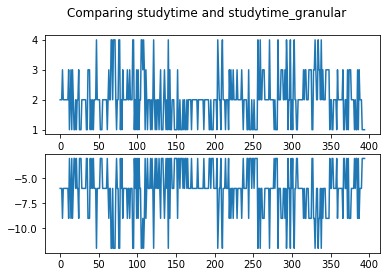

In [32]:
studytime = students.studytime
studytime_granular = students.studytime_granular

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Comparing studytime and studytime_granular")
ax1.plot(studytime)
ax2.plot(studytime_granular)

According to the graphs above studytime and studytime_granular are complete opposites, we can drop one of the columns:

In [33]:
# removing 'studytime_granular' column from the dataframe
students.drop(columns='studytime_granular', inplace=True)

In [34]:
# famrel
IQRfunkc('famrel')


This data is for column famrel 
 Q1: 4.0 
 Q3: 4.5 
 Bottom border:3.25 ; Top border:5.25

Number of rows that are lower than bottom outlier border 87
Number of rows that are higher than top outlier border 0


In [35]:
students[(students.famrel < 3.25) | (students.famrel > 5.25)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
16,GP,F,16,U,GT3,T,4.0,4.0,services,services,reputation,mother,1.0,3.0,no,yes,yes,yes,yes,yes,yes,no,3.0,2.0,3.0,2.0,6.0,70.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,no,no,no,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,MS,F,17,R,GT3,T,2.0,2.0,other,at_home,home,mother,1.0,3.0,no,no,no,yes,yes,yes,no,yes,3.0,4.0,3.0,3.0,8.0,55.0
380,MS,M,18,U,GT3,T,4.0,4.0,teacher,teacher,home,father,1.0,2.0,no,no,yes,yes,no,yes,yes,no,3.0,2.0,4.0,2.0,4.0,70.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0


famrel supposed to be in range between 1 and 5:

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

need to make sure that there are no values that are lower than 1 or higher than 5

In [36]:
students[(students.famrel < 1) | (students.famrel > 5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [37]:
# we can see that there is one unexpected/incorrect value -1,
# we can change this to 1 instead:
students.famrel = students.famrel.replace(-1.0, 1)

In [38]:
# freetime
IQRfunkc('freetime')


This data is for column freetime 
 Q1: 3.0 
 Q3: 4.0 
 Bottom border:1.5 ; Top border:5.5

Number of rows that are lower than bottom outlier border 18
Number of rows that are higher than top outlier border 0


freetime shoulw be in range between 1 and 5:

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Need to make sure that are no values that are lower than 1 or higher than 5

In [39]:
students[(students.freetime < 1) | (students.freetime > 5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score


There are no errors here, we can keep all the values for this column

In [40]:
# absences
IQRfunkc('absences')


This data is for column absences 
 Q1: 0.0 
 Q3: 8.0 
 Bottom border:-12.0 ; Top border:20.0

Number of rows that are lower than bottom outlier border 0
Number of rows that are higher than top outlier border 17


In [41]:
# Checking outliers for absences
students[(students.absences > 20)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,no,yes,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,T,3.0,3.0,other,other,reputation,mother,1.0,2.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,T,4.0,4.0,services,teacher,home,mother,2.0,1.0,no,yes,no,no,yes,yes,yes,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,other,reputation,mother,1.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,yes,yes,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,T,4.0,3.0,services,other,home,father,1.0,2.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,no,yes,no,no,no,no,yes,yes,4.0,1.0,1.0,5.0,75.0,45.0


we can see that there are a few extreme values, let's check how many:

In [42]:
students[(students.absences > 100)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,yes,yes,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


There are two ways of dealing with such extremes:
1. drop these rows
2. change values to something less extreme(usually it is median)

I will choose to change the values to median, in order to preserve data for the rest of the columns

In [43]:
# replacing with median, because its only two records, we can do this manualy:
students.absences = students.absences.replace(
    385.0, students.absences.median())
students.absences = students.absences.replace(
    212.0, students.absences.median())

We can keep the rest of the values

___

# Checking numeric columns

In [44]:
# columns that have numeric values
# selecting all columns (after removing the 2 columns)that have dtype = 'float64' or 'int64'
n = students.select_dtypes(exclude='object')
numeric = n.columns.tolist()  # generating column title list
numeric

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'go_out',
 'health',
 'absences',
 'score']

Numbers for age column


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

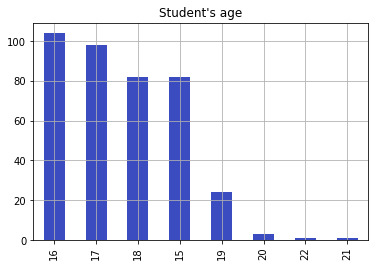

In [45]:
# Student's age (age)
bar_plot('age', "Student's age")

Majority of the students are between age 15 and 18

Numbers for Medu column


count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64

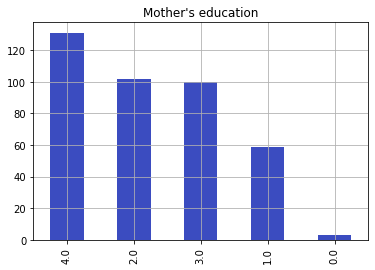

In [46]:
# Mother's education (Medu)
bar_plot('Medu', "Mother's education")

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

We can see that around 51% of the mothers' education is between 5-9 grade or middle school only. 33% of all mothers presented in this dataframe have higher education, and less than 16% of mothers have less than 5 grade

Numbers for Fedu column


count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

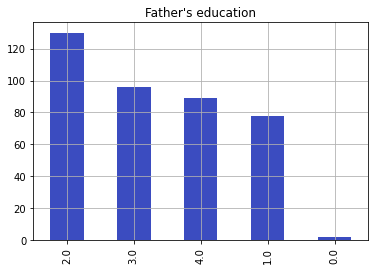

In [47]:
# Father's education (Fedu)
bar_plot('Fedu', "Father's education")

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

We can see that around 33% of the fathers' education is between 5-9 grade. Only 22% of fathers got higher education, and 20% of fathers have less than 5 grade

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa931ec6610>,
      dtype=object)

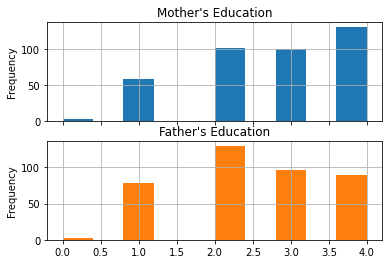

In [48]:
# Comparing parent's education level

students[['Medu', 'Fedu']].plot(kind='hist',
                                grid=True,
                                subplots=True,
                                title=["Mother's Education",
                                       "Father's Education"],
                                legend=False)

We can see that mothers have higher levels of education comparing to fathers

Numbers for traveltime column


count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

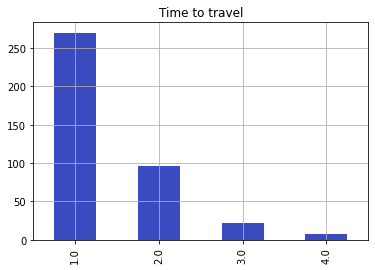

In [49]:
# Time that takes students to get to school (traveltime)
bar_plot('traveltime', 'Time to travel')

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Majority of the students travel to school 15 minutes or less, only 7 students spend more than 60 minutes

Numbers for studytime column


count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

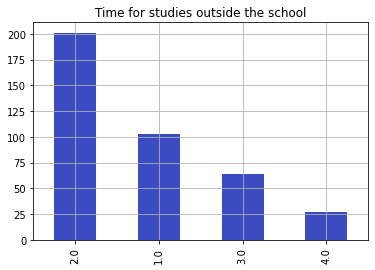

In [50]:
# Time for studies outside the school (studytime)
bar_plot('studytime', 'Time for studies outside the school')

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Majority of students spend between 2 and 5 hours for studies outside the school hours. Only 7% of students spend more than 10 hours

Numbers for famrel column


count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

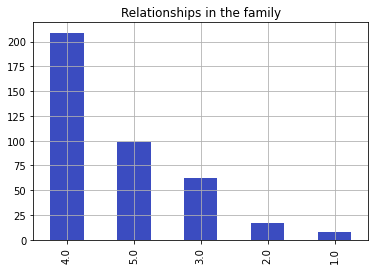

In [51]:
# Relationships in the family (famrel)
bar_plot('famrel', 'Relationships in the family')

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Mostly relationships in the family are good (4 and 5 points), only 6% of students have bad relationships in the family

Numbers for freetime column


count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

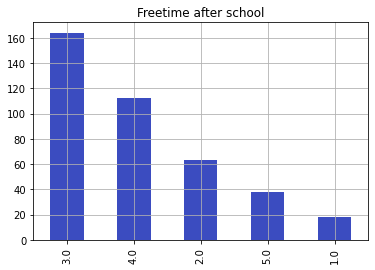

In [52]:
# Freetime after school (freetime)
bar_plot('freetime', 'Freetime after school')

 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Only 4% of students are very busy after school, other students have a moderate amount of free time after school

Numbers for go_out column


count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

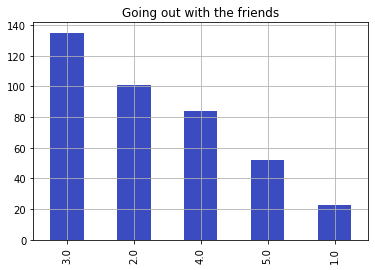

In [53]:
# Going out with the friends (go_out)
bar_plot('go_out', 'Going out with the friends')

проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Most of the students have a decent amount of time to spend with their friends. Only around 2% of students spend very little time with their friends.

Numbers for health column


count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

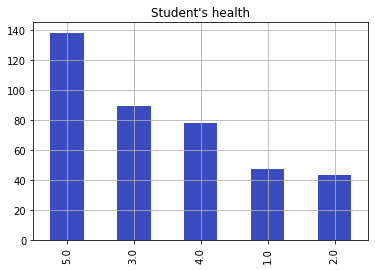

In [54]:
# Student's health (health)
bar_plot('health', "Student's health")

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

22% of all students have some serious health issues (1 and 2 points) and around 35% of all students have no health issues at all.

Numbers for absences column


count    395.000000
mean       5.688608
std        7.950146
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

0.0     111
4.0      67
2.0      60
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
54.0      1
25.0      1
17.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

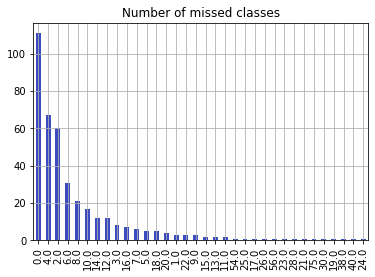

In [55]:
# Number of missed classes (absences)
bar_plot('absences', "Number of missed classes")

84% of all students have had 10 absences or less, and 28% of all students did not miss any class

Numbers for score column


count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

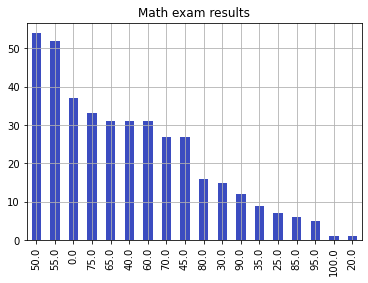

In [56]:
# Math exam results (score)
bar_plot('score', "Math exam results")

17% of students got 40 or less points for their exam - failed

64% of students got between 40 and 70 points for their exam - average

19% of students got 70 or more points for their exam - very good


___

# Correlation analysis
## Creating a heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

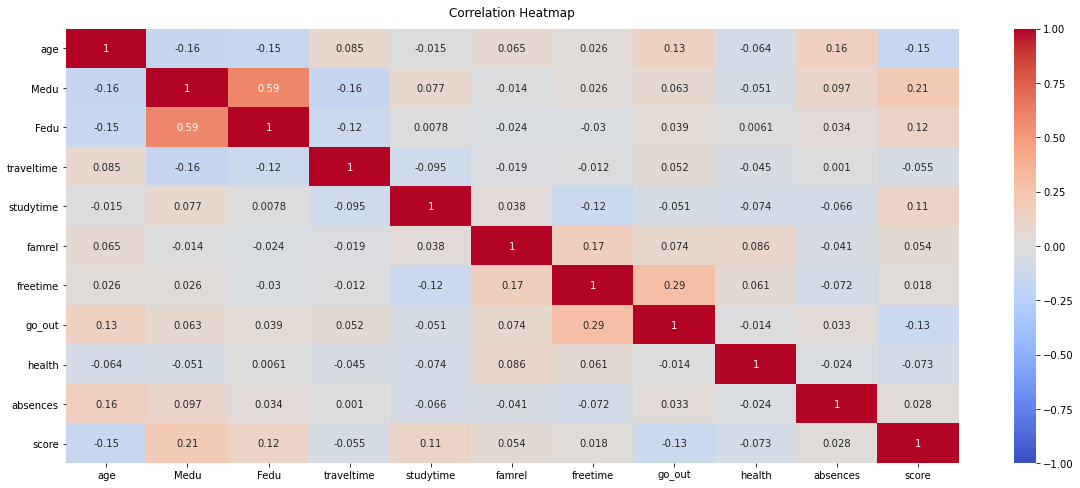

In [57]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(students.corr(), vmin=-1, vmax=1,
                      cmap='coolwarm', annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

there is no definite reason that is affecting the final exam score, however, we can look more closely at those that have 10% and more. The columns are as follows: age(-), Medu(+), Fedu(+), studytime(+), go_out(-).

On this map we can see a positive correlation between go_out and freetime, the more freetime students have, the more time they spend with their friends. Also a positive correlation between family relationship and freetime, the better the relationships in the family, the more freetime a student have.

One of the strongest correlations is the parents' education level. The higher the level one of the parents has, the higher level another one has. The higher level of education of the parents also positively correlates with the final exam score.

___

# Analysis of categorical values

Unfortunately, we can not use correlation analisys with categorical values. However, we can check how the score values changes depending on these values. The below are box-plots for all the categorical columns:

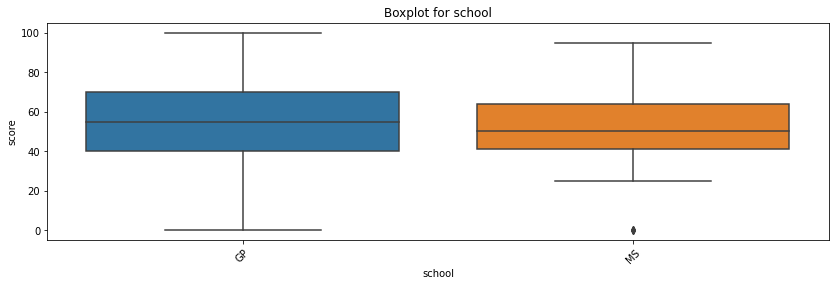

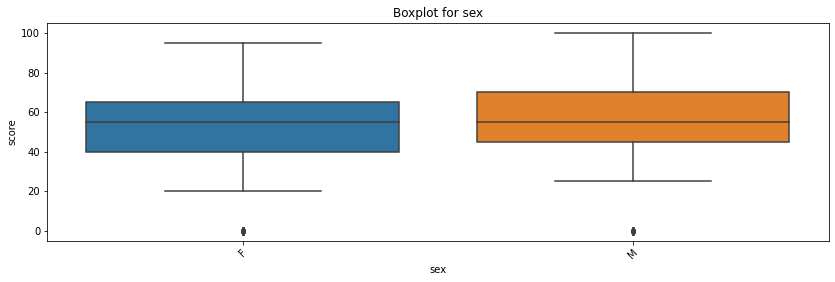

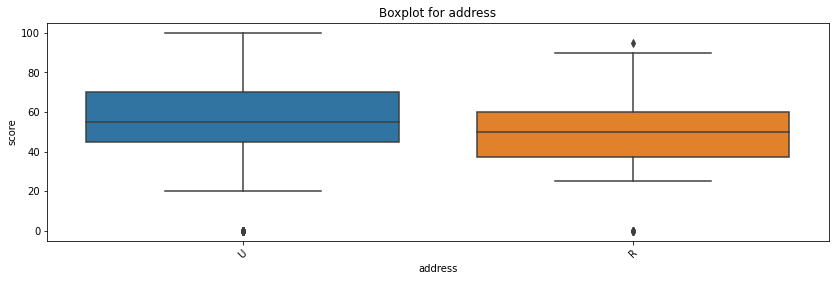

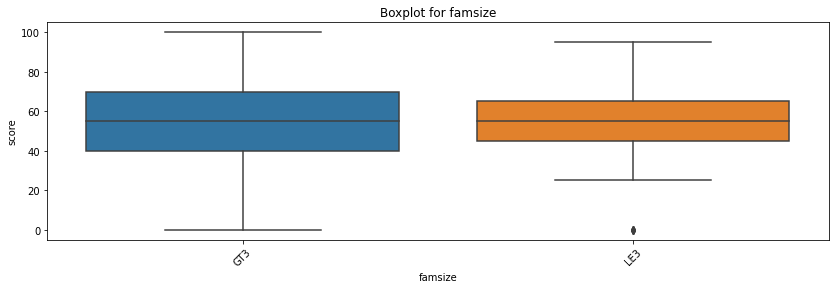

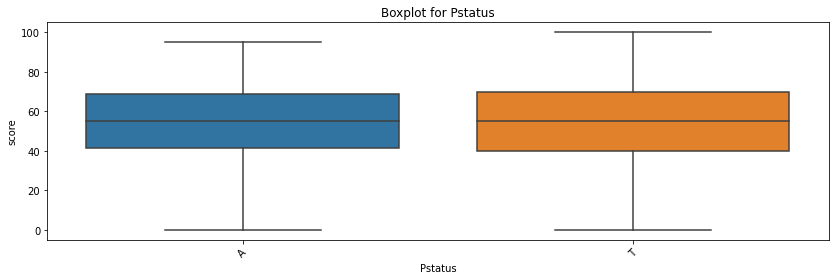

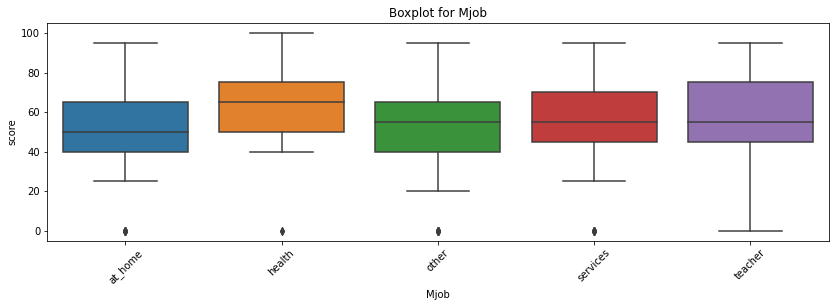

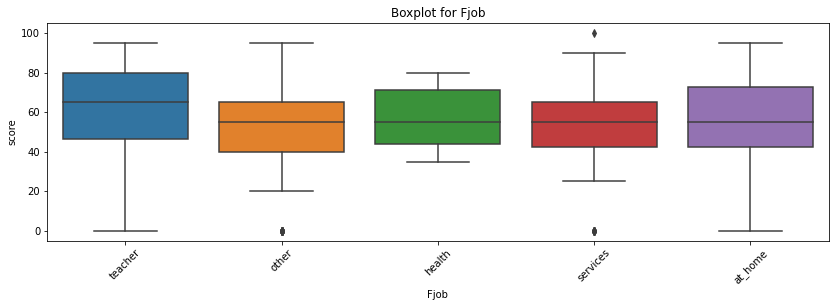

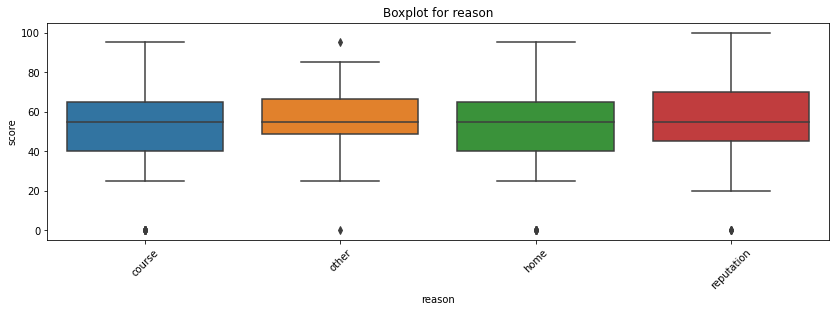

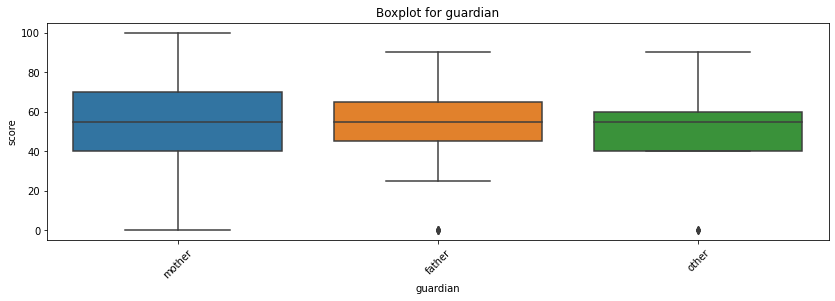

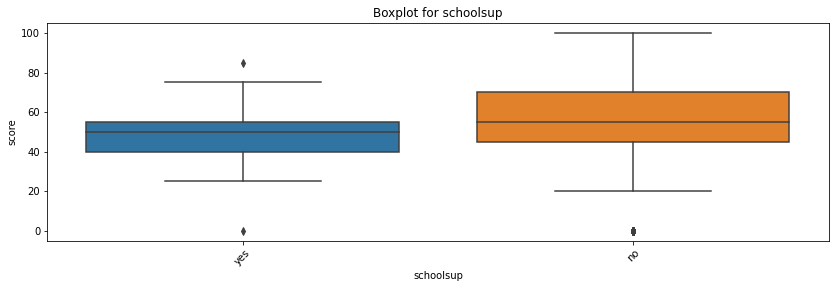

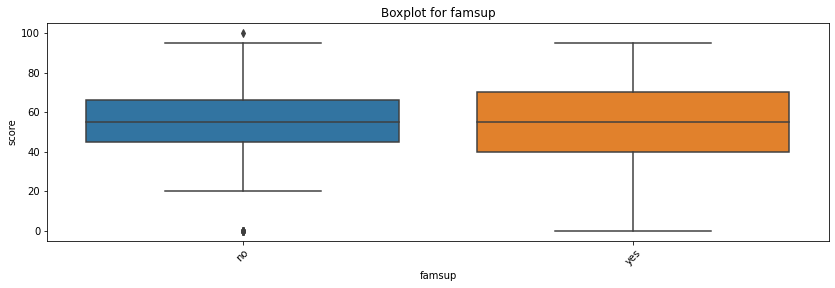

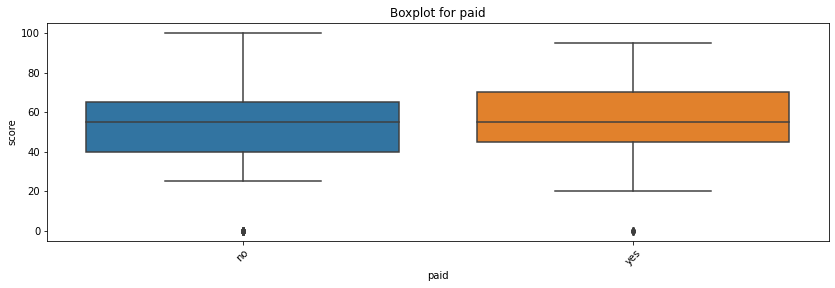

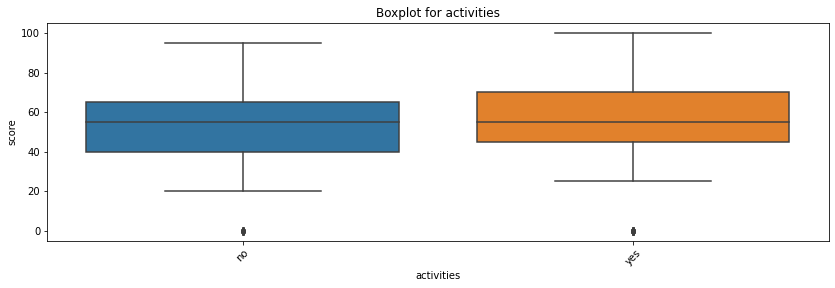

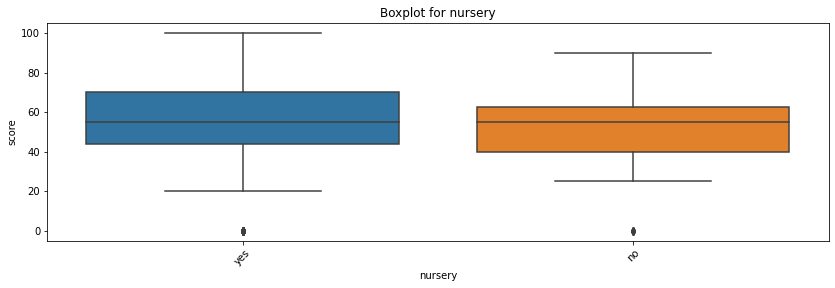

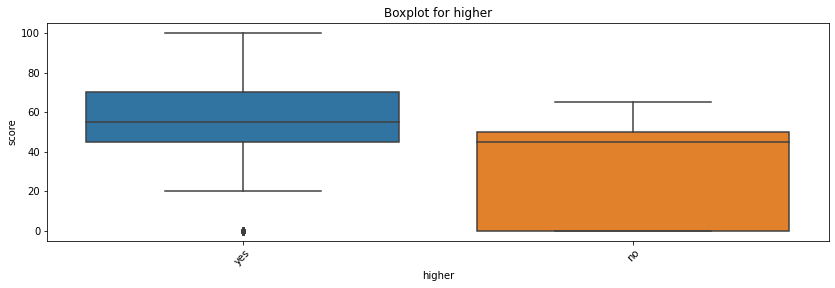

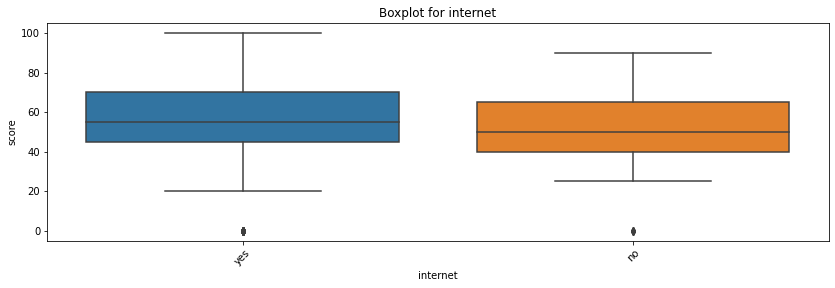

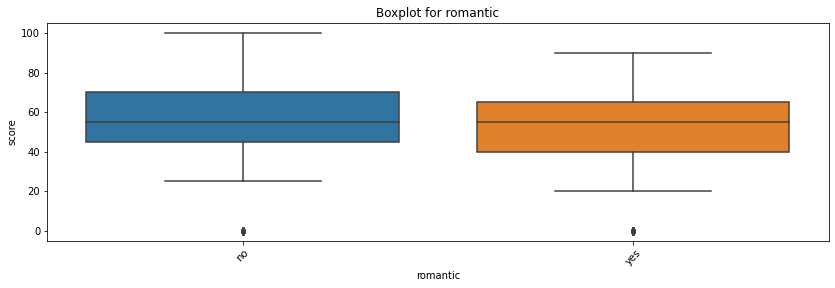

In [58]:
for col in categ:
    get_boxplot(col)

Looking at the above graphs is hard to tell which of the values affecting the score more. We can check the statistical difference using Student's test.

We can test the null hypothesis that the distribution of the final math exam (score) by various parameters are indistinguishable:

In [59]:
for col in categ:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


As we can see there are 4 parameters that are seriously different. They are: 
* address (urban or rural)
* Mjob - mother's job
* higher - if student planning to get higher education after the school
* romantic - if student is romanticly involved

___

# Conclusion

In our case we can say that important parameeters that probably affect the final score are: 
* age - students age
* Medu - mother's education
* Fedu - father's education
* studytime - the time that students spend studying after school 
* go_out - going out with the friends
* address - (urban or rural)
* Mjob - mother's job
* higher - if student planning to get higher education after the school
* romantic - if student is romanticly involved

we will keep the above variables in our dataframe for further model building:

In [60]:
# Adding the above columns to the model dataframe
st_model = students.loc[:, ['age', 'Medu', 'Fedu', 'studytime', 'go_out',
                            'address', 'Mjob', 'higher', 'romantic']]
st_model.head()

,age,Medu,Fedu,studytime,go_out,address,Mjob,higher,romantic
0,18,4.0,4.0,2.0,4.0,U,at_home,yes,no
1,17,1.0,1.0,2.0,3.0,U,at_home,yes,no
2,15,1.0,1.0,2.0,2.0,U,at_home,yes,no
3,15,4.0,2.0,3.0,2.0,U,health,yes,yes
4,16,3.0,3.0,2.0,2.0,U,other,yes,no


In the result of the EDA analisys for final math exam score we came to the following conclusions:

* there were 565 NaN values in total, we changed those with a median for numerical values and with 'ffil' method for categorical values
* There were 4 outliers that we had to deal with,  2 were input mistakes, and 2 were extreme values - fixed those manually. Even though there were more values marked as outliers, using common sense we kept them, as the values were in the expected range. 
* After filling NaN values and fixing the 4 outliers, we can tell that the data is clear
* there is no definite reason that is affecting the final exam score, but we can use the following columns for further model building: age, Medu, Fedu, studytime, go_out, address, Mjob, higher, romantic
* when building a model we will need to replace categorical values with a dummy variables using 1 or 0 based on the presence or absence of the categorical value in the record. This is required to do since the machine learning algorithms only work on the numerical data. That is why there is a need to convert the categorical column into a numerical one.




